<a href="https://colab.research.google.com/github/HssngH/ToBigs18/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 18기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.
데이터셋 출처 :  https://www.kaggle.com/datasets/shenba/time-series-datasets

### Box-Jenkins 방법론
대략적 흐름 예시를 확인하고 싶다면 첨부한 '시계열자료_참고자료.pdf'를 읽어주세요.

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib.pyplot as plt

## 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/ToBigs/week5_time series&svm/Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [6]:
df.DATE = pd.to_datetime(df.DATE)

In [14]:
df = df.rename(columns={'IPG2211A2N': 'Electric_Production'})

In [7]:
df = df.set_index("DATE")
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [8]:
df.index.freq = 'MS'

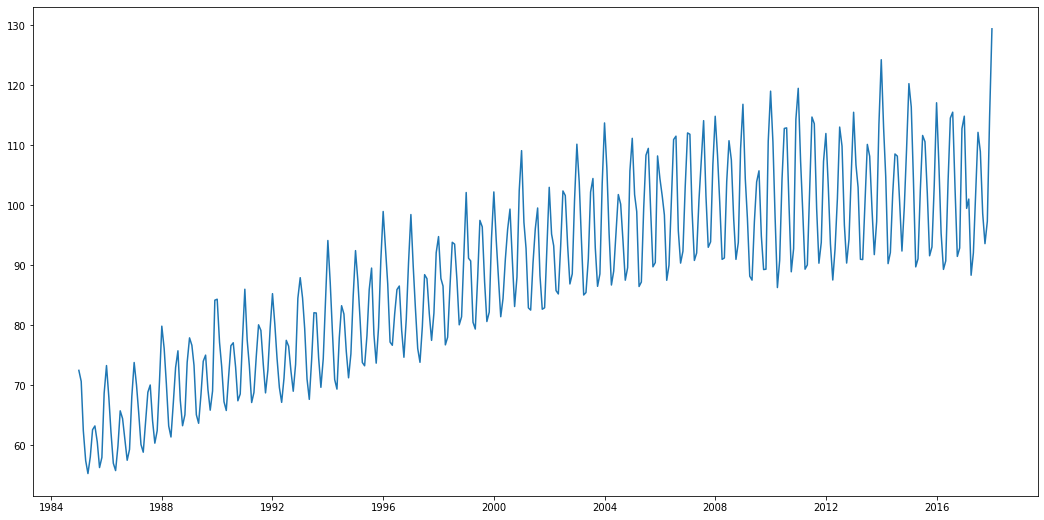

In [15]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Electric_Production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Electric_Production')
plt.show()

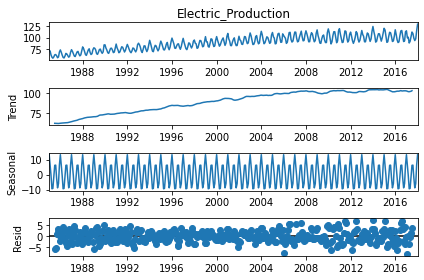

In [17]:
season = seasonal_decompose(df["Electric_Production"], model = "add")
season.plot();

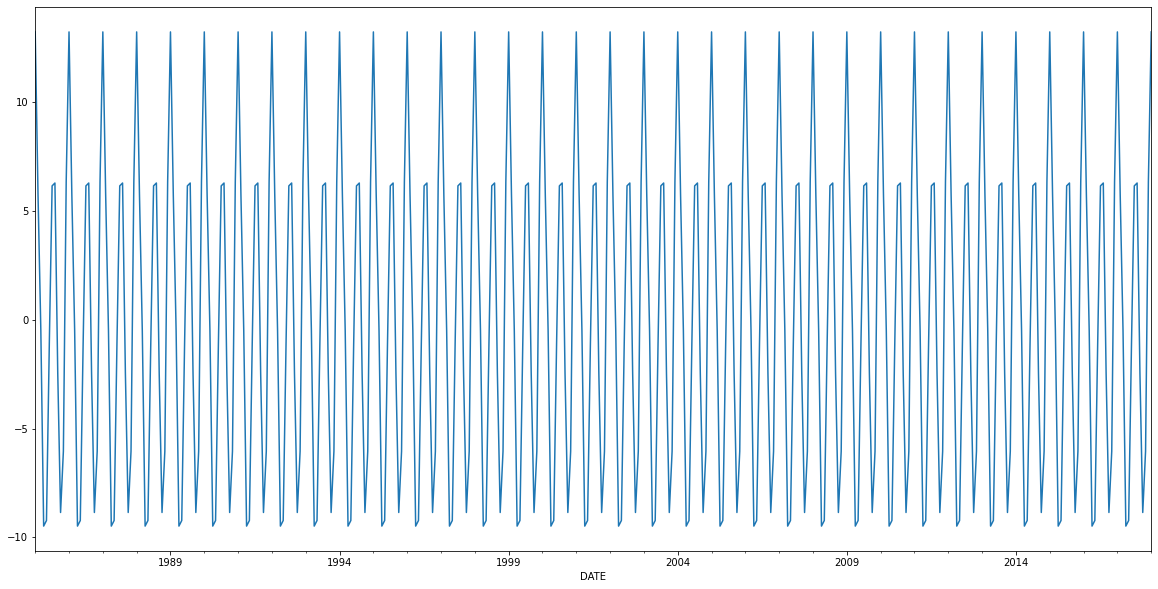

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
season.seasonal.plot();

In [21]:
# prophet 패키지 사용
from prophet import Prophet 

m = Prophet()
m.fit(df)

ValueError: ignored